In [1]:
import sympy
import symfem
import numpy as np
import matplotlib.pyplot as plt
from sympy import lambdify
import dill
dill.settings["recurse"] = True

In [3]:
x, y, p, q = sympy.symbols("x y p q")
x1, x2, x3, x4, x5, x6 = sympy.symbols("x1:7")
y1, y2, y3, y4, y5, y6 = sympy.symbols("y1:7")

## My basis

In [591]:
monomial_basis = sympy.Matrix([
    1,
    x,
    x**2,
    x**3,
    y,
    y**2,
    y**3,
    x*y,
    x*y**2,
    x**2*y
])

In [592]:
V = sympy.zeros(10, 10)

for i, basis in enumerate(monomial_basis):
    
    V[i, 0] = basis.subs({x: 0, y: 0})
    V[i, 1] = basis.subs({x: 1, y: 0})
    V[i, 2] = basis.subs({x: 0, y: 1})

    # edge 1
    V[i, 3] = basis.subs({x: 0, y: R(1,3)})
    V[i, 4] = basis.subs({x: 0, y: R(2,3)})

    # edge 2
    V[i, 5] = basis.subs({x: R(1,3), y: 0})
    V[i, 6] = basis.subs({x: R(2,3), y: 0})

    # center of mass
    V[i, 7] = basis.subs({x: R(1,3), y: R(1,3)})

    V[i, 8] = -basis.subs(y, 1-x).diff(x).subs({x: 1})
    V[i, 9] = -basis.subs(y, 1-x).diff(x).subs({x: 0})

In [593]:
new_basis = V.inv() @ monomial_basis

In [594]:
points = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
])

v1 = np.array([+0.0, +1.0])
v1 /= np.linalg.norm(v1)

v2 = np.array([-1.0, +0.0])
v2 /= np.linalg.norm(v2)

In [621]:
X = points[0, 0]*new_basis[0] + points[1, 0]*new_basis[1] + \
    points[2, 0]*new_basis[2] + \
    (1/3*points[0, 0]+2/3*points[2, 0])*new_basis[3] + \
    (2/3*points[0, 0]+1/3*points[2, 0])*new_basis[4] + \
    (1/3*points[0, 0]+2/3*points[1, 0])*new_basis[5] + \
    (2/3*points[0, 0]+1/3*points[1, 0])*new_basis[6] + \
    points[:3, 0].mean()*new_basis[7] + \
    v1[0]*new_basis[8] + v2[0]*new_basis[9]

Y = points[0, 1]*new_basis[0] + points[1, 1]*new_basis[1] + \
    points[2, 1]*new_basis[2] + \
    (1/3*points[0, 1]+2/3*points[2, 1])*new_basis[3] + \
    (2/3*points[0, 1]+1/3*points[2, 1])*new_basis[4] + \
    (1/3*points[0, 1]+2/3*points[1, 1])*new_basis[5] + \
    (2/3*points[0, 1]+1/3*points[1, 1])*new_basis[6] + \
    points[:3, 1].mean()*new_basis[7] + \
    v1[1]*new_basis[8] + v2[1]*new_basis[9]

In [622]:
tt = np.linspace(0, 1, 100)
e1_x = sympy.lambdify([x, y], X)(tt, 1-tt)
e1_y = sympy.lambdify([x, y], Y)(tt, 1-tt)

e2_x = sympy.lambdify([x, y], X)(0, tt)
e2_y = sympy.lambdify([x, y], Y)(0, tt)

e3_x = sympy.lambdify([x, y], X)(tt, 0)
e3_y = sympy.lambdify([x, y], Y)(tt, 0)

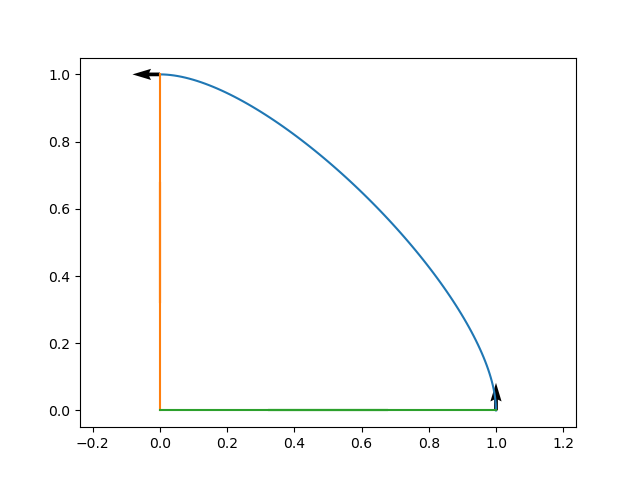

In [623]:
%matplotlib widget
fig, ax = plt.subplots()
ax.plot(e1_x, e1_y)
ax.plot(e2_x, e2_y)
ax.plot(e3_x, e3_y)
ax.quiver(points[1, 0], points[1, 1], v1[0], v1[1])
ax.quiver(points[2, 0], points[2, 1], v2[0], v2[1])
ax.axis("equal");

In [624]:
J = sympy.Matrix([X, Y]).jacobian([x, y])

In [625]:
t = np.linspace(0.0, 1, 50)
tx, ty = np.meshgrid(t, t, indexing="ij")
mask = (1-tx >= ty)
tx = tx[mask]
ty = ty[mask]

In [626]:
XX = sympy.lambdify([x, y], X)
YY = sympy.lambdify([x, y], Y)

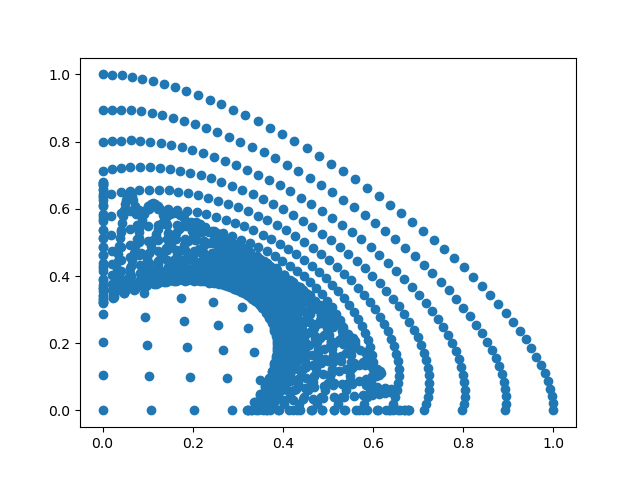

In [627]:
plt.subplots()
plt.scatter(XX(tx, ty), YY(tx, ty))

In [613]:
tz = sympy.lambdify([x, y], J.det())(tx, ty)
# tz = sympy.lambdify([x, y], new_basis[-4])(tx, ty)

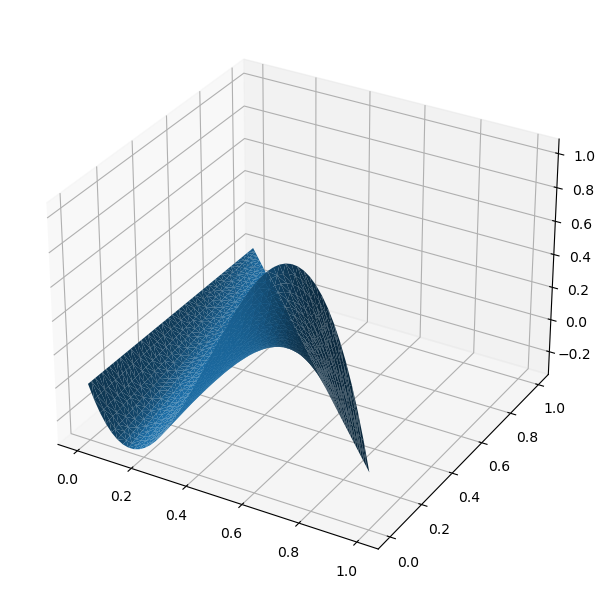

In [612]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection="3d"))
ax.plot_trisurf(tx, ty, tz)
fig.tight_layout()
plt.show()